<a href="https://colab.research.google.com/github/Bilol2747/python_darslarim/blob/main/Diabet_Tashxisi_amaliyot_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
!wget https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/diabetes.csv

--2025-03-23 06:18:48--  https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23105 (23K) [text/plain]
Saving to: ‘diabetes.csv.2’

diabetes.csv.2      100%[===================>]  22.56K  --.-KB/s    in 0.002s  

2025-03-23 06:18:48 (10.8 MB/s) - ‘diabetes.csv.2’ saved [23105/23105]



In [56]:
df= pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [59]:
df.corrwith(df['Outcome']).sort_values(ascending=False)

,0
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


In [60]:
x= df.drop('Outcome', axis=1).values
y=df['Outcome']

In [91]:
from sklearn.model_selection import train_test_split
x_t, x_s, y_t, y_s= train_test_split(x, y, test_size=0.2, random_state=54)
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=16)
knn.fit(x_t, y_t)
y_predict= knn.predict(x_s)

In [93]:
from sklearn.metrics import jaccard_score
jaccard_score(y_s, y_predict)

np.float64(0.38095238095238093)

In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_s, y_predict)

array([[91, 14],
       [25, 24]])

In [95]:
from sklearn.metrics import f1_score, precision_score
precision_score(y_s, y_predict)

0.631578947368421

In [80]:
print(classification_report(y_s, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       105
           1       0.65      0.41      0.50        49

    accuracy                           0.74       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.73      0.74      0.72       154



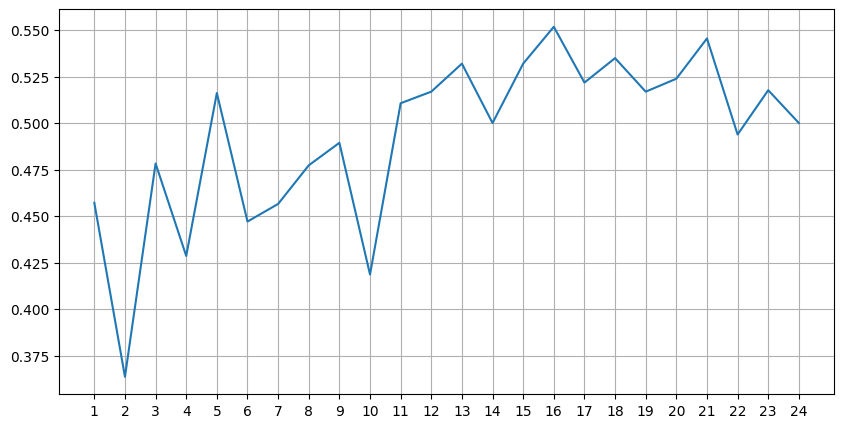

In [86]:
f1=[]
for k in range(1, 25):
  knn= KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_t,  y_t)
  y_predict=knn.predict(x_s)
  f1.append(f1_score(y_s,  y_predict))
plt.figure(figsize=(10, 5))
plt.plot( range(1, 25), f1)
plt.xticks(range(1, 25))
plt.grid()
plt.show()

In [81]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
predict=cross_val_predict(estimator=knn, X=x, y=y, cv=5)
print(classification_report(y, predict))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       500
           1       0.71      0.46      0.55       268

    accuracy                           0.74       768
   macro avg       0.73      0.68      0.69       768
weighted avg       0.74      0.74      0.73       768



In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(x,  y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [84]:
knn_gscv.best_params_

{'n_neighbors': np.int64(14)}

In [85]:
knn_gscv.best_score_

np.float64(0.7578558696205755)